# Aula 07 - Medidas de Tendência Central (Médias)

## Importação das Bibliotecas

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats

## Principais Tipos de Média

### Média Aritmética (MA)
- É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c938ca170f8c4a5d2dddecabc5ae1d5eb5f35a2b)

In [2]:
dados = [1,2,5,3,4]
np.mean(dados)

3.0

### Média Geométrica (MG)

- É a raíz n-ésima do produto de todos os elementos que compõe o conjunto

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/82fb3d898a5de7ae016b07855c335ce570350410)

In [3]:
gmean(dados)

2.6051710846973517

### Média Harmônica (MH)

- É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5335415727099e38ba27a1775613020dc4b584de)

In [4]:
hmean(dados)

2.18978102189781

## Quando Utilizar Cada Média?

### Funções para Plotar Gráficos

In [0]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [0]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [0]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considerando Diferentes Cenários

#### Cenário Linear

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [0]:
# Lista de dados com comportamento linear (soma)
dados_linear = [1, 4, 7, 10, 13, 16, 19]

In [0]:
# Cálculo da média aritmética do conjunto de dados
media = int(np.mean(dados_linear))

In [10]:
# Imprimindo o valor da média
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


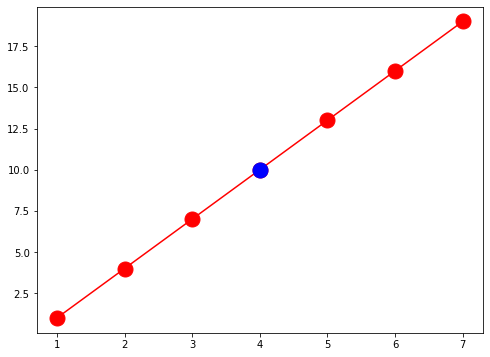

In [11]:
# Plotando gráfico de linha. Observe o compostamento linear ascendente dos
# dados. O ponto azul representa a média aritmética. Portanto, como o ponto azul
# (média) ocupa a posição central, a média aritmética de fato é representativa
# de uma medida (de tendência) central
plot_lines(dados_linear,media)

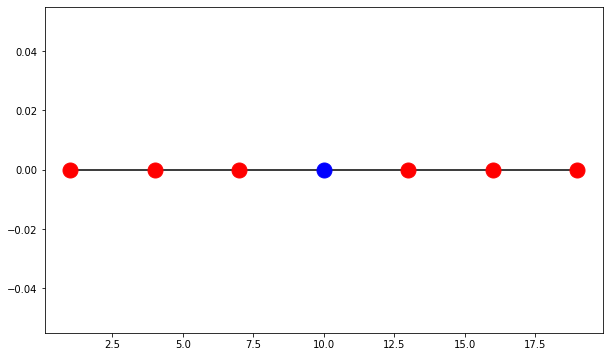

In [12]:
# Plotagem de gráfico linear constante com os dados. Note que, novamente, os
# dados são representativos de uma posição de fato central
plot_lines_horizontal(dados_linear,media)

#### Cenário Exponencial

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a multiplicação de cada elemento pelo valor de 3 (relacionamento exponencial)

In [0]:
# Dados que apresentam relacionamento exponencial entre si
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

##### Média Aritmética de Dados Exponenciais

In [0]:
# Cálculo da média aritmética desses dados
media = int(np.mean(dados_exponencial))

In [15]:
# Impressão do valor da média aritmética desses dados
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 156


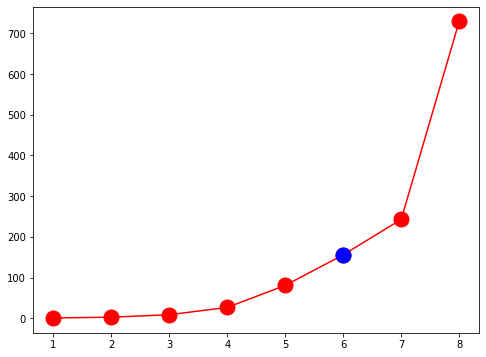

In [16]:
# Plotagem de gráfico de linha. Note que o ponto azul (média aritmética) não é
# representativo de uma medida de fato central para dados exponenciais
plot_lines(dados_exponencial,media)

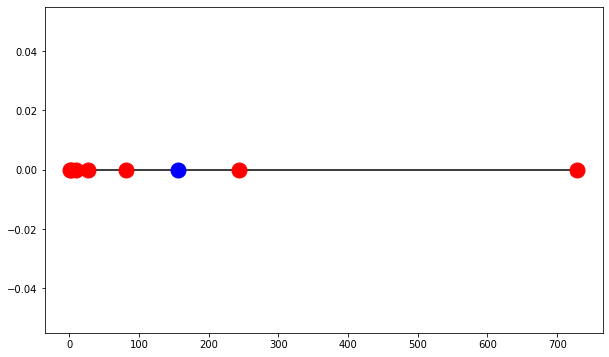

In [17]:
# Plotagem do gráfico de linha constante. Note que o ponto azul (média 
# aritmética) não é representativo de uma medida central de fato
plot_lines_horizontal(dados_exponencial,media)

##### Média Geométrica de Dados Exponenciais

In [0]:
# Dados que apresentam relação exponencial
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

In [0]:
# Cálculo da média geométrica para os dados exponenciais
media_geo = int(gmean(dados_exponencial))

In [20]:
# Impressão do resultado da média geométrica para os dados exponenciais
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 27


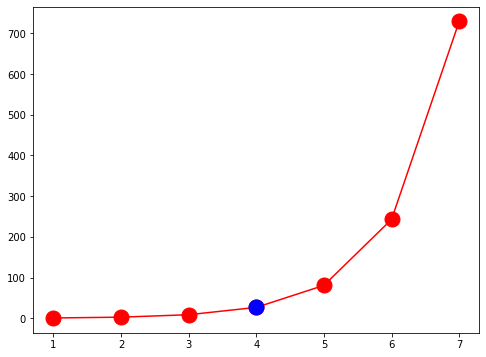

In [21]:
# Plotagem do gráfico de linha. Note que o ponto azul (média geométrica) não é
# tão influenciado pelos extremos quanto a média aritmética
plot_lines(dados_exponencial,media_geo)

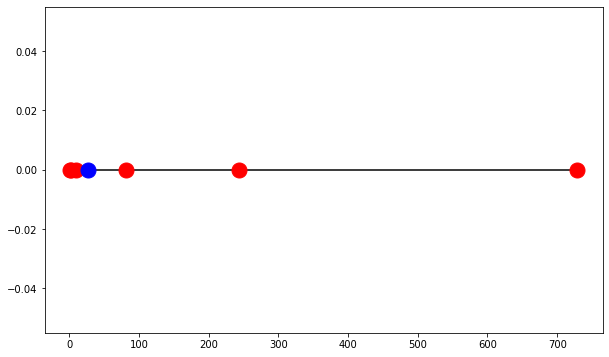

In [22]:
# Plotagem do gráfico de linha constante. Note que para o caso de dados
# exponenciais, a média geométrica é representativa de uma medida central
plot_lines_horizontal(dados_exponencial,media_geo)

### Considerações importantes

*   A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
*   Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
*   Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial.


*   A diferença entre as médias é que enquanto a média aritmética faz a **soma** de todos os elementos e depois a **divisão**, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da **raiz** os valores para a mesma unidade da amostra.








# Aula 08 - Diferenças entre Média Aritmética, Geométrica e Harmônica

## Comparando as médidas em um cenário real.

- Verificando os valores de avaliações de dois cafés: 
    - Hard Rock Café Gramado x Hard Rock Café Curitiba.


**Hard Rock Café Gramado**
*   Avaliações no TripAdvisor: 3,5
*   Índice de Satisfação dos Clientes: 89%

**Hard Rock Café Curitiba**
*   Avaliaçõs no TripAdvisor: 4,5
*   Índice de Satisfação dos Clientes: 75%


## Aplicação de verificar o estabelecimento com a melhor avaliação em diferentes escalas

- Temos escalas de (0 - 5) e (0 - 100)

### Cálculo da Média Aritmética

- A partir do cálculo da média aritmética para cada lugar, o estabelecimento de Gramado é melhor avaliado
- A média aritmética não é adequada para esse caso, pois os valores encontram-se em escalas diferentes

In [0]:
# Declaração de 4 variáveis. Duas de cada vez
aval_gramado,aval_curitiba = 3.5, 4.5
indice_gramado,indice_curitiba = 89, 75

In [24]:
# Imprimindo o valor das média aritméticas para cada estabelecimento
# Aparentemente, o Café de Gramado tem uma avaliação melhor
# Entretanto, como os valores apresentam-se em escalas diferentes, a média
# aritmética não é o valor mais coerente para realizar essa avaliação
print("Média para Gramado: {}".format(np.mean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba,indice_curitiba])))

Média para Gramado: 46.25
Média para Curitiba: 39.75


### Cálculo da Média Aritmética dos valores reescalados

- Com os valores reescalados, o estabelecimento de Curitiba apresenta melhor avaliação

In [26]:
# Vamos fazer uma reescala dos valores, para adequar os valores da escala 0-5
# para a escala 0-100. Para isso, basta multiplicarmos os valores por 20
print("Valores reescalados: {},{}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalados: 70.0,90.0


In [27]:
# Cálculo da média aritmética agora com os valores reescalados
print("Média para Gramado: {}".format(np.mean([aval_gramado*20,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba*20,indice_curitiba])))

Média para Gramado: 79.5
Média para Curitiba: 82.5


### Cálculo da Média Geométrica

- Através do cálculo da média geométrica, o estabelecimento de Curitiba apresenta melhor avaliação (assim como para a média aritmética dos valores reescalados)
- Como os valores se encontram em escalas distintas, a média geométrica é muito mais assertiva para comparar os estabelecimentos do que a média aritmética
- A média geométrica de fato apresentou o estabelecimento de melhor avaliação, mas os valores obtidos através dela não são interpretáveis, no sentido de não estar na mesma unidade dos valores de input
- Caso a média aritmética fosse a escolhida para ser utilizada, deve-se adequar a escala dos valores antes de calculá-la para comparar os estabelecimentos. Nessa situação, ela retornaria o resultado correto do estabelecimento melhor avaliado e os resultados seriam interpretáveis (mesma unidade dos valores de input)

In [30]:
# Cálculo da média geométrica para cada estabelecimento, sem que os valores
# estejam reescalados
print("Média Geométrica para Gramado: {}".format(gmean([aval_gramado,indice_gramado])))
print("Média Geométrica para Curitiba: {}".format(gmean([aval_curitiba,indice_curitiba])))

Média Geométrica para Gramado: 17.64936259472279
Média Geométrica para Curitiba: 18.371173070873837


### Considerações
*   Os valores alterados para a mesma escala nos deram **resultados diferentes** mais próximos da realidade
*   Utilizando a média geométrica já nos entrega o resultado "correto" pois considera o **relacionamento multiplicativo** entre os dados da amostra
*   É importante notar que aplicando a média geométrica para os dados em **diferentes escalas** o retorno não está na mesma unidade da amostra




# Aula 09 - Estudo de Caso sobre Média Harmônica

## Qual é a Velocidade Média de toda a Viagem?

![alt text](https://images.unsplash.com/photo-1469854523086-cc02fe5d8800?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=500&q=60)


Percurso Total da Viagem 10km
*   CAMINHO DE IDA = 30km/h
*   CAMINHO DE VOLTA = 10km/h

Utilizando d = v.t, teríamos:

IDA:

  - 5 = 30.t
    - t = 0.17 h

VOLTA:

  - 5 = 10.t
    - t = 0.5 h

Velocidade média da viagem:

- v = 10 / 0.67 ~ **14.9 Km/h**




## Cálculo da Média Aritmética

- Como a velocidade é uma variável NÃO ADITIVA (é uma razão), não faz sentido físico tirar a média aritmética

In [34]:
print("A média aritmética é: {} Km/h".format(np.mean([30,10])))

A média aritmética é: 20.0 Km/h


## Cálculo da Média Ponderada

### Cálculo da Proporção do Tempo de Viagem gasto para a ida e para a volta

- Considerando que na ida gastou-se ~ 10 min e, na volta, ~ 30 min (cálculo feito no d = v.t). O total de tempo da viagem é de 40 min

In [35]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))
print("Proporção de tempo da viagem de volta em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%
Proporção de tempo da viagem de volta em relação ao tempo total da viagem: 75.0%


### Média Ponderada

- Os pesos da média ponderada são dados em termos da proporção do tempo de viagem para ida e volta
- O resultado retornado pela média ponderada é correto, pois há uma ponderação pelo tempo de viagem gasto nas viagens de ida e volta

In [37]:
print("Velocidade Média Total = {} Km/h".format(np.average([30,10], weights=[.25,.75])))

Velocidade Média Total = 15.0 Km/h


## Cálculo da Média Harmônica

- A média harmônica já leva em consideração as ponderações e portanto retorna um resultado mais adequado para a velocidade média
- A média harmônica pode ser utilizada para situações em que devemos ponderar o cálculo do valor média por alguma variável
- A média harmônica pode ser utilizada para se tirar média de variáveis que são razões

In [41]:
print("Velocidade Média Total = {} Km/h".format(hmean([30,10])))

Velocidade Média Total = 15.0 Km/h


# Resumo

## Bibliotecas Principais

 - from scipy.stats.mstats import gmean,hmean
 - from scipy import stats

 - import numpy as np

## np.mean( [x1,x2,x3,...,xn] ) - Média Aritmética

- Utilizada para variáveis que apresentam relações aditivas

## gmean ( [x1,x2,x3,...,xn] ) - Média Geométrica

- Utilizada para variáveis que apresentam relações multiplicativas e exponenciais

- Utilizada quando quer se tirar média de valores em escalas diferentes

## hmean ( [x1,x2,x3,...,xn] ) - Média Harmônica

- Utilizada para variáveis que apresentam relações de divisão (razões em geral, p.e. Ca/Mg, V)



